In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
path = "ex1data1.txt"
data = pd.read_csv(path,header=None,names=["population","profit"])
print(data)

    population    profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


In [195]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


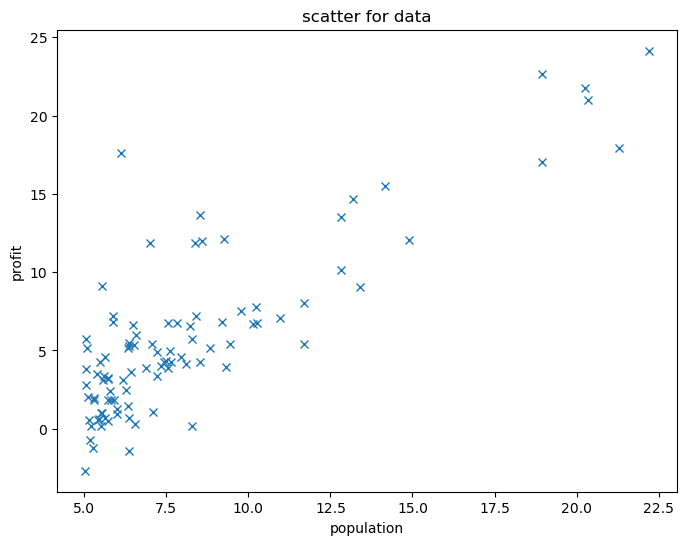

In [196]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
ax.plot(data["population"],data["profit"],"x")
ax.set_xlabel("population")
ax.set_ylabel("profit")
plt.title("scatter for data")
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$] 

In [197]:
def compute_cost(X,y,theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

在训练集中添加一列，以便可以使用向量化的方式计算cost function和gradient

In [198]:
data.insert(0,"ones",1)
print(data)

    ones  population    profit
0      1      6.1101  17.59200
1      1      5.5277   9.13020
2      1      8.5186  13.66200
3      1      7.0032  11.85400
4      1      5.8598   6.82330
..   ...         ...       ...
92     1      5.8707   7.20290
93     1      5.3054   1.98690
94     1      8.2934   0.14454
95     1     13.3940   9.05510
96     1      5.4369   0.61705

[97 rows x 3 columns]


初始化变量

In [199]:
cols = data.shape[1]
print(cols)
X = data.iloc[:,0:cols - 1]
print(X)
y = data.iloc[:,cols - 1:cols]
print(y)

3
    ones  population
0      1      6.1101
1      1      5.5277
2      1      8.5186
3      1      7.0032
4      1      5.8598
..   ...         ...
92     1      5.8707
93     1      5.3054
94     1      8.2934
95     1     13.3940
96     1      5.4369

[97 rows x 2 columns]
      profit
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]


In [200]:
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [201]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数应该是Numpy矩阵，所以需要转换X和y，才可以使用他们，同时还需要初始化theta

In [202]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [203]:
print(X)
print(y)
print(theta)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [204]:
theta

matrix([[0, 0]])

In [205]:
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

计算cost function（$\theta$初始值为0）

In [206]:
compute_cost(X,y,theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

\begin{aligned}&\frac{\partial}{\partial\theta_{j}}J(\theta_{0},\theta_{1})=\frac{\partial}{\partial\theta_{j}}\frac{1}{2m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)^{2}\\&j=0\text{时:}\frac{\partial}{\partial\theta_{0}}J(\theta_{0},\theta_{1})=\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)\\&j=1\text{时:}\frac{\partial}{\partial\theta_{1}}J(\theta_{0},\theta_{1})=\frac{1}{m}\sum_{i=1}^{m}\left(\left(h_{\theta}(x^{(i)})-y^{(i)}\right)\cdot x^{(i)}\right)\end{aligned}

In [207]:
def gradient_descent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = compute_cost(X,y,theta)

    return theta,cost


初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [208]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [209]:
g,cost = gradient_descent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [210]:
compute_cost(X,y,g)

4.515955503078914

绘制模型图

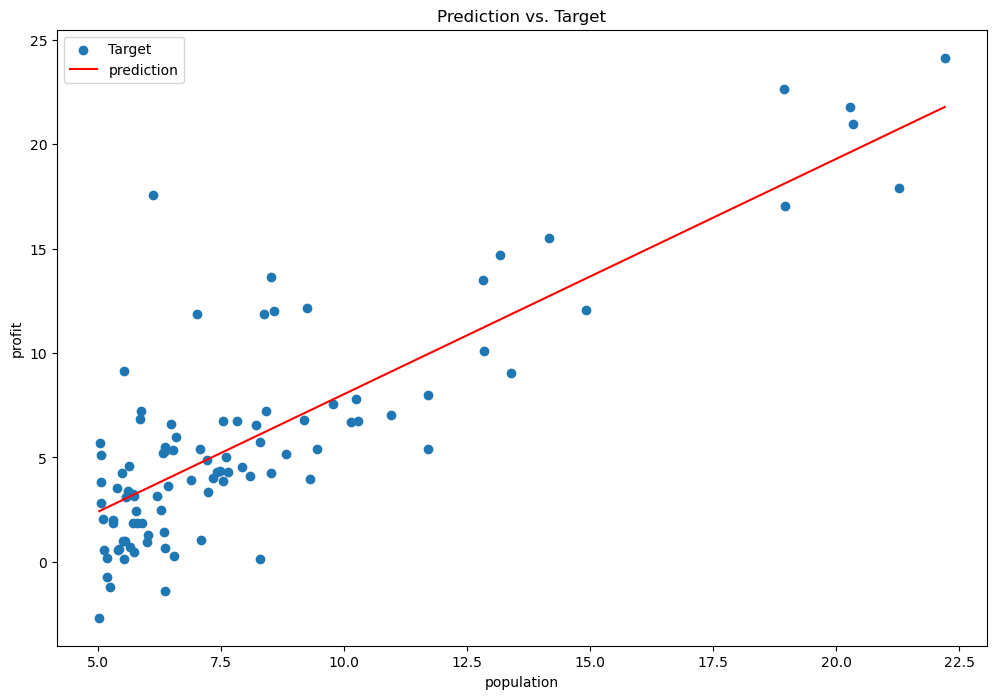

In [211]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))
ax.scatter(data["population"],data["profit"],label="Target")
x = np.linspace(data.population.min(),data.population.max(), 100)
y = g[0,0] + g[0,1] * x
ax.plot(x,y,label="prediction",color="r")
ax.legend(loc="best")
ax.set_xlabel("population")
ax.set_ylabel("profit")
ax.set_title("Prediction vs. Target")
plt.show()

绘制梯度下降的过程

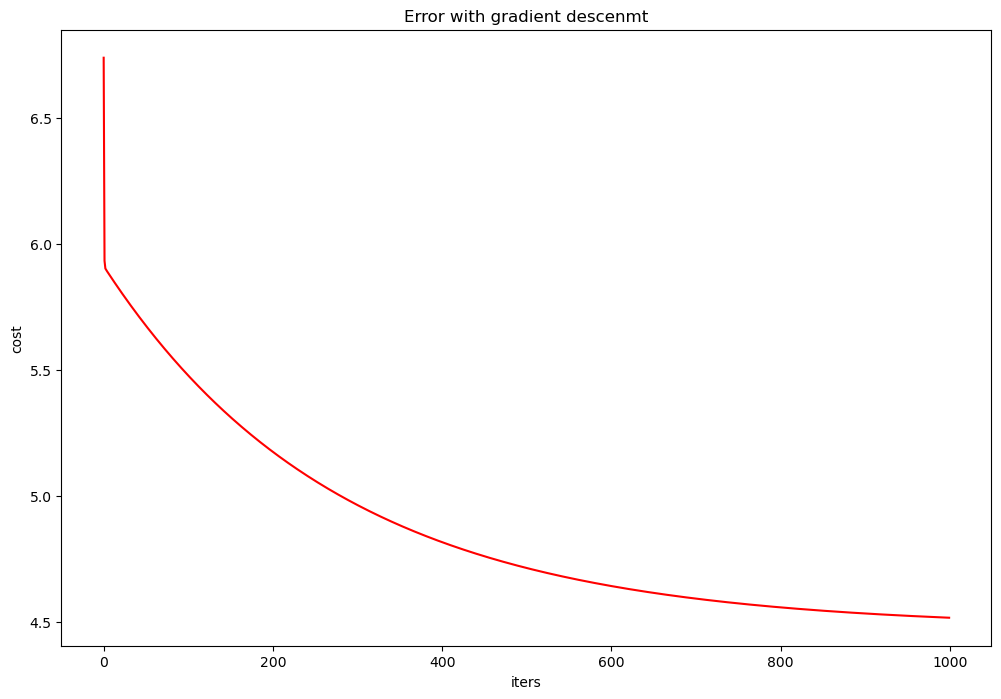

In [216]:
fig,ax = plt.subplots(ncols=1,figsize=(12,8))
ax.plot(np.arange(iters),cost,color='r')
ax.set_xlabel("iters")
ax.set_ylabel("cost")
ax.set_title("Error with gradient descenmt")
plt.show()